In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/Perrin Freres monthly champagne sales millions.csv')
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [2]:
# data is from 1964 to 1972
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [3]:
df = df.drop(df.index[-2:])

In [4]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [5]:
df.columns = ['Month','Sales']
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [6]:
df['Month'] = pd.to_datetime(df['Month'])
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [7]:
df.set_index('Month', inplace=True)
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [8]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


<Axes: xlabel='Month'>

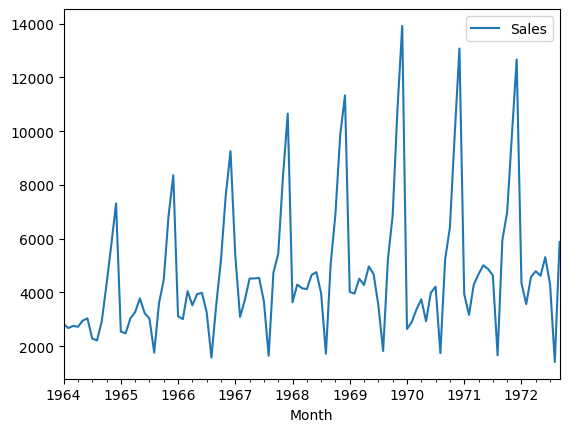

In [9]:
df.plot()

In [12]:
#the above data looks seasonal
# We have to check whether the data is stationary - statistically , then we need to convert it to stationary froms

from statsmodels.tsa.stattools import adfuller
test_result = adfuller(df['Sales'])
# print(test_result)

# H0 : It is non stationary - nul hypo
# H1 : It is stationary

def adfullertest(sales):
  result = adfuller(sales)
  labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
  for value,label in zip(result,labels):
    print(label+' : '+str(value))

  if result[1] <= 0.05:
    print("Reject the null hypothesis - therefore data is stationary")
  else:
    print("Fail to reject the null hypothesis ... data is non stationary")

adfullertest(df['Sales'])

ADF Test Statistic : -1.8335930563276215
p-value : 0.36391577166024586
#Lags Used : 11
Number of Observations Used : 93
Fail to reject the null hypothesis ... data is non stationary


In [14]:
# we have observed that the above data is non stationary , hence we will have to transform to aplly ARIMA

#Now we will have to apply differencing .
# Logic goes like for a linear function f(x) = mx+c , mean keeps on increasing or decreasing and may not remain the same
# Hence to transform the function to stationary version we will using the differences between 2 data points,
# Difference then would be a constant value which would be stationary

df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)
df['Sales Seasonal Difference'] = df['Sales'] - df['Sales'].shift(12)
df.head(50)

,Sales,Sales First Difference,Sales Seasonal Difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [15]:
#As the above data is seasonal we pass the seasonal data into the Dickey fullers test

adfullertest(df['Sales Seasonal Difference'].dropna())


ADF Test Statistic : -7.626619157213166
p-value : 2.0605796968136632e-11
#Lags Used : 0
Number of Observations Used : 92
Reject the null hypothesis - therefore data is stationary


<Axes: xlabel='Month'>

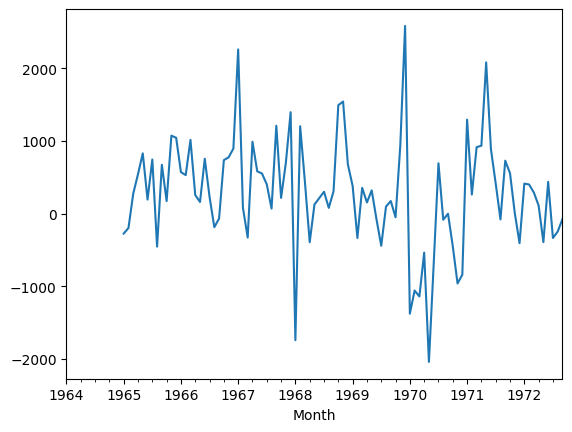

In [17]:
# we observe that the p-value is < 0.05 .... and the data is stationary , so now we can apply the arima

df['Sales Seasonal Difference'].plot()

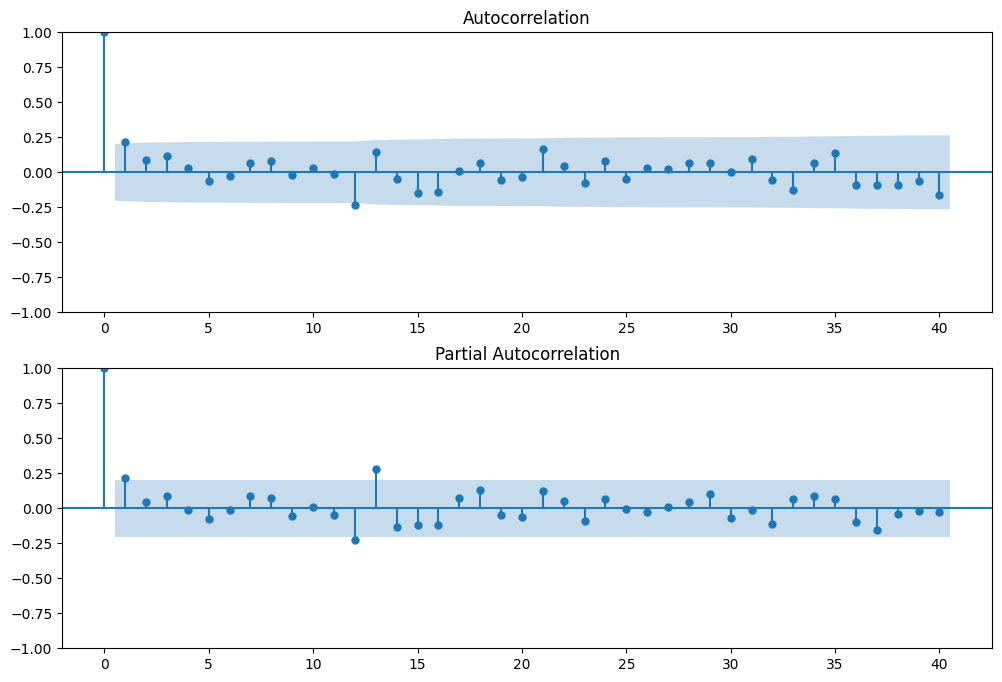

In [21]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Sales Seasonal Difference'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['Sales Seasonal Difference'].dropna(),lags=40,ax=ax2)

# Now based on the plots we will have to decide the value of (p,d,q) that will be passed to ARIMA
#p- value : Indicates the value for AR - should be looked at PACF plot
#q- value : Indicates the value for MA - should be looked at ACF plot
#The values for the above must be observed at a point where the plots suddenly shut off and fall off at a steady range

# In ACF plot we will have exponential decrease whereas in PACF plot we will have sudden decrease
# D-value indicates the number of seasonal differencing - We did it once hence d=1




In [33]:
import statsmodels.api as sm

In [34]:
# p=1 , d=1 , q=0,1 ( u can try on both)
#ARIMA must be used only when the data is not seasonal hence we are using Seasonal ARIMA
model = sm.tsa.statespace.SARIMAX(df['Sales'], order=(1,1,1) , seasonal_order=(1,1,1,12))
result = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [35]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                  105
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -738.402
Date:                            Tue, 30 Jul 2024   AIC                           1486.804
Time:                                    12:05:44   BIC                           1499.413
Sample:                                01-01-1964   HQIC                          1491.893
                                     - 09-01-1972                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2790      0.081      3.433      0.001       0.120       0.438
ma.L1         -0.9494      0.043    -22.334      0.000      -1.033      -0.866
ar.S.L12      -0.4544      0.303     -1.499      0.134      -1.049       0.140
ma.S.L12       0.2450      0.311      0.788      0.431      -0.365       0.855
sigma2      5.055e+05   6.12e+04      8.265      0.000    3.86e+05    6.25e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):                 8.70
Prob(Q):                              0.61   Prob(JB):                         0.01
Heteroskedasticity (H):               1.18   Skew:                            -0.21
Prob(H) (two-sided):                  0.64   Kurtosis:                         4.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Month'>

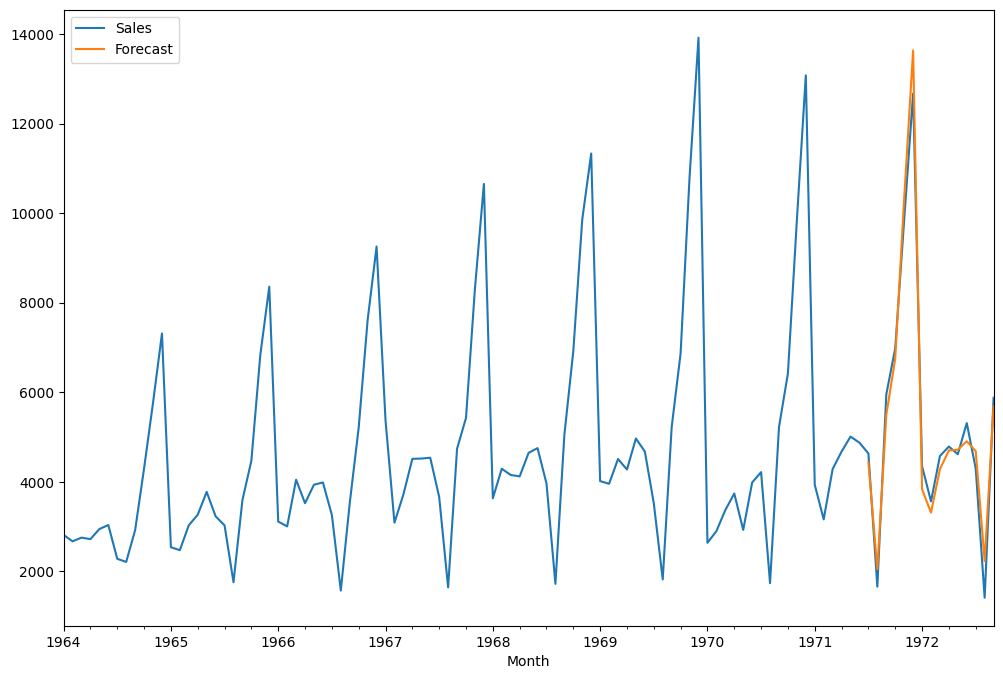

In [37]:
df['Forecast'] = result.predict(start=90 , end=104 , dynamic=True)
df[['Sales','Forecast']].plot(figsize=(12,8))


In [38]:
# In the above code we see that the model is doing well and has identified seasonality and predicted no we will have to try with future dates
# We generate new dates and try predictions for them
from pandas.tseries.offsets import DateOffset
future_dates = [df.index[-1] + DateOffset(months=x) for x in range(0,24)]
future_dates_df = pd.DataFrame(index=future_dates[1:],columns=df.columns)
future_dates_df.tail()

,Sales,Sales First Difference,Sales Seasonal Difference,Forecast
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN


<ipython-input-44-96927a21a5dd>:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df =pd.concat([df,future_dates_df])


<Axes: >

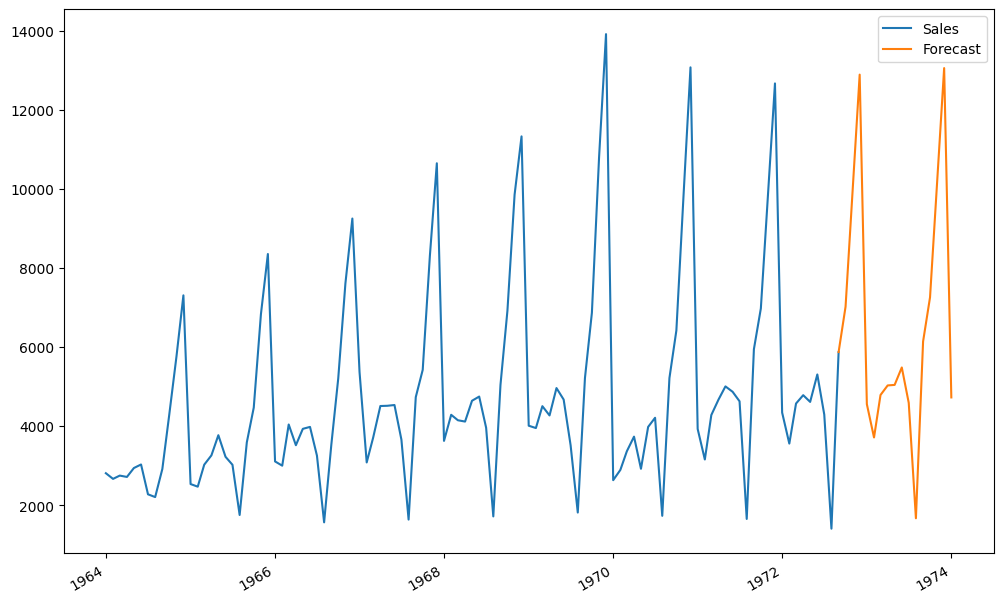

In [44]:
df =pd.concat([df,future_dates_df])

df['Forecast'] = result.predict(start=104,end=120,dynamic=True)
df[['Sales','Forecast']].plot(figsize=(12,8))